In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style("whitegrid")

In [2]:
articles = pd.read_csv('../data/articles.csv')
customers = pd.read_csv('../data/customers.csv')
transactions = pd.read_csv('../data/transactions_train.csv')

In [3]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

## Duplicates check

In [4]:
## Find duplicates
print("Number of duplicated transactions: ", transactions.duplicated().sum()) # there are duplicates in transations - same item that is bought twice? 
print("Number of duplicated customers: ", customers.duplicated().sum())
print("Number of duplicated articles: ", articles.duplicated().sum())

Number of duplicated transactions:  2974905
Number of duplicated customers:  0
Number of duplicated articles:  0


In [5]:
## duplicates statistics
duplicates = transactions[transactions.duplicated(keep=False)].groupby(transactions.columns.tolist(), as_index=False).size()
duplicates[['size']].describe()

,size
count,2.543908e+06
mean,2.169423e+00
std,9.123337e-01
min,2.000000e+00
25%,2.000000e+00
50%,2.000000e+00
75%,2.000000e+00
max,5.690000e+02


In [6]:
## List of popular articles among duplicates (more than 10 identical transactions) 
top_duplicated_articles = duplicates[duplicates['size'] > 10]['article_id']
print(top_duplicated_articles) # 2858 articles

368        577513001
383        467302100
848        638553001
1577       306307002
1974       633148001
             ...    
2537520    772902001
2538060    865926002
2540421    677930023
2540990    685814062
2542843    909059002
Name: article_id, Length: 2858, dtype: int64


In [7]:
# Number of duplicates for each unique row
duplicated_articles = duplicates['article_id']
print("Most popular articles among duplicates")
articles[articles['article_id'].isin(duplicated_articles)]['product_type_name'].value_counts()[:20]

Most popular articles among duplicates


Trousers            8494
Dress               8348
Sweater             6918
T-shirt             5579
Top                 3249
Blouse              3195
Shorts              2957
Jacket              2799
Shirt               2595
Vest top            2329
Skirt               2206
Underwear bottom    2141
Bra                 1860
Hoodie              1609
Leggings/Tights     1272
Socks               1260
Swimwear bottom     1109
Cardigan            1105
Sneakers            1069
Blazer               913
Name: product_type_name, dtype: int64

### Nan values check

In [8]:
articles.isna().sum() # nans in detail_desc

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [9]:
transactions.isna().sum() # no nans

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [10]:
customers.isna().sum() # a lot of nans

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

## Customer dataframe analysis

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [12]:
print("Active: \t\t", customers['Active'].unique()) # add 0 class
print("FN: \t\t\t", customers['FN'].unique()) # add 0 class
print("Club member status: ", customers['club_member_status'].unique()) # add no info class
print("News: \t\t", customers['fashion_news_frequency'].unique()) # can we combine all the None?


Active: 		 [nan  1.]
FN: 			 [nan  1.]
Club member status:  ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
News: 		 ['NONE' 'Regularly' nan 'Monthly' 'None']


In [13]:
customers.groupby(['fashion_news_frequency']).size() # only 2 None, can be combined with NONE, another category for empty values

fashion_news_frequency
Monthly         842
NONE         877711
None              2
Regularly    477416
dtype: int64

In [14]:
## Check for the lenght of fields
print("Postal code lenght, unique values: ", customers['postal_code'].apply(len).unique())
print("Customer id lenght, unique values: ", customers['customer_id'].apply(len).unique()) # length is the same

Postal code lenght, unique values:  [64]
Customer id lenght, unique values:  [64]


In [18]:
customers['postal_code'].value_counts() # one value that is extremely popular 
## but we cannot combine code to get cities 

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

Text(0.5, 1.0, 'Customer age')

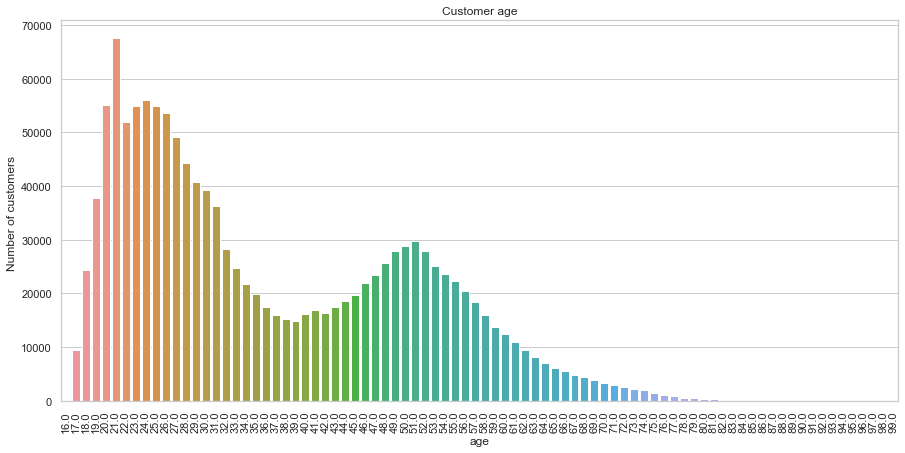

In [74]:
plt.figure(figsize=(15, 7))
sns.countplot(x='age', data=customers.sort_values('age'))
plt.xticks(rotation=90)

plt.ylabel("Number of customers ")
plt.title("Customer age") 

Text(0.5, 1.0, 'Age')

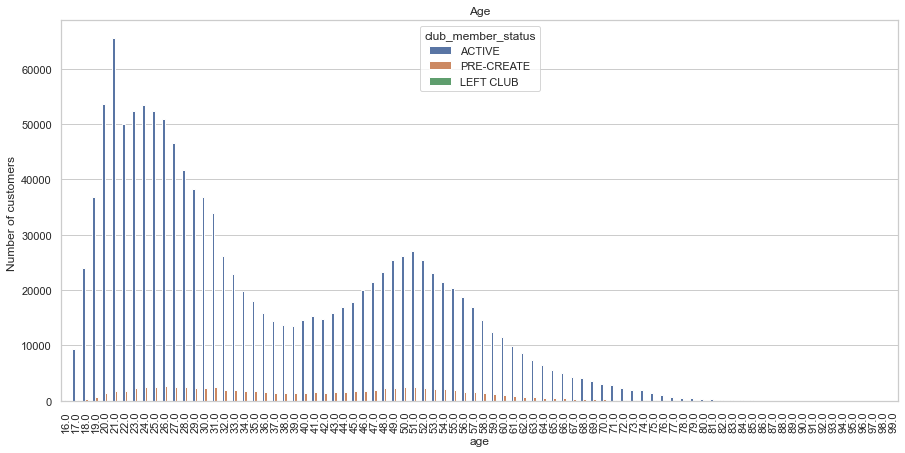

In [75]:
### if pre-create means a new customer then bases of new and existing customers are different

plt.figure(figsize=(15, 7))
sns.countplot(x='age', data=customers.sort_values('age'), hue='club_member_status')
plt.xticks(rotation=90)

plt.ylabel("Number of customers ")
plt.title("Age") 

In [22]:
## Age looks relevant
print('Min customer age: ', customers['age'].min())
print('Max customer age: ', customers['age'].max())

Min customer age:  16.0
Max customer age:  99.0


## Transaction dataframe analysis 

In [44]:
transactions['t_dat'] = transactions['t_dat'].astype('datetime64[ns]')
transactions['t_month'] = transactions['t_dat'].astype('datetime64[M]')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
 5   min_date          datetime64[ns]
 6   t_month           datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(1)
memory usage: 1.7+ GB


In [24]:
## for every article first and last dates of purchases
dates_min_max = transactions.groupby(['article_id', 'sales_channel_id'])['t_dat'].agg(['min','max', 'count']).reset_index()

dates_min_max['month_year_max'] = dates_min_max['max'].astype('datetime64[M]')
dates_min_max['month_year_min'] = dates_min_max['min'].astype('datetime64[M]')

## lifetime of an article (months)
dates_min_max['diff_month'] = ((dates_min_max['month_year_max'] - dates_min_max['month_year_min'])/np.timedelta64(1, 'M'))
dates_min_max['diff_month'] = dates_min_max['diff_month'].astype(int)

dates_min_max['month_year_max'] = dates_min_max['month_year_max'].astype(str)
dates_min_max['month_year_min'] = dates_min_max['month_year_min'].astype(str)

dates_min_max.head()

,article_id,sales_channel_id,min,max,count,month_year_max,month_year_min,diff_month
0,108775015,1,2018-09-20,2020-07-22,2485,2020-07-01,2018-09-01,21
1,108775015,2,2018-09-20,2020-06-03,8356,2020-06-01,2018-09-01,20
2,108775044,1,2018-09-20,2020-08-06,2101,2020-08-01,2018-09-01,22
3,108775044,2,2018-09-20,2020-09-20,5149,2020-09-01,2018-09-01,24
4,108775051,1,2019-05-24,2019-05-24,1,2019-05-01,2019-05-01,0


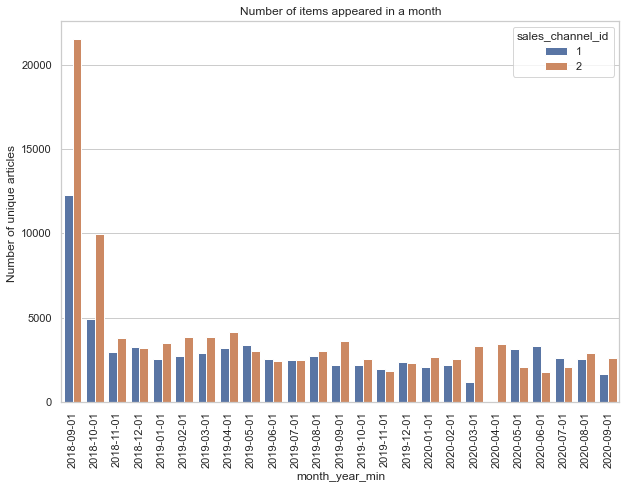

In [72]:

dates_min_max = dates_min_max.sort_values('month_year_min')
# 2 - online, 1- store
plt.figure(figsize=(10, 7))
fig=sns.countplot(x='month_year_min', data=dates_min_max.sort_values('month_year_min'), hue='sales_channel_id')
plt.xticks(rotation=90)

plt.ylabel("Number of unique articles ")
plt.title("Number of items appeared in a month")
plt.show(fig)

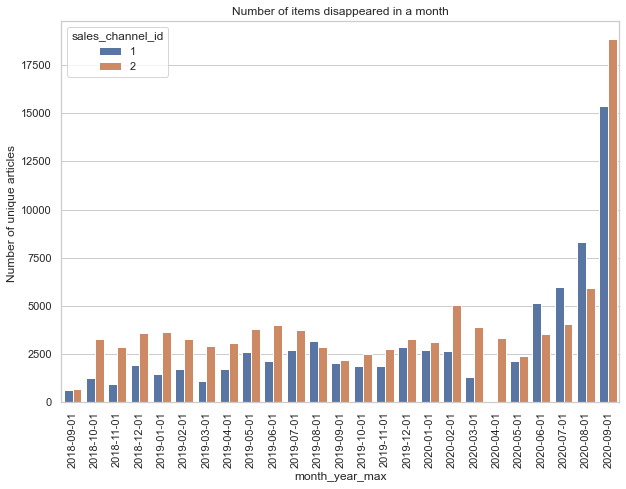

In [73]:
# 2 - online, 1- store
plt.figure(figsize=(10, 7))
sns.countplot(x='month_year_max', data=dates_min_max.sort_values('month_year_max'), hue='sales_channel_id')
plt.xticks(rotation=90)

plt.ylabel("Number of unique articles ")
plt.title("Number of items disappeared in a month") 
plt.show(fig)

In [29]:
articles_columns = ['article_id', 'product_code', 'prod_name',
       'product_type_name', 'product_group_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name']
dates_min_max = dates_min_max.merge(articles[articles_columns], on='article_id', how='left')

<Figure size 720x504 with 0 Axes>

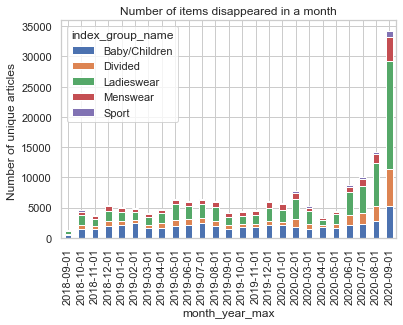

In [76]:
df_plot = dates_min_max.groupby(['index_group_name', 'month_year_max']).size().reset_index().pivot(columns='index_group_name', index='month_year_max', values=0)
plt.figure(figsize=(10, 7))

df_plot.plot(kind='bar', stacked=True)

plt.ylabel("Number of unique articles ")
plt.title("Number of items disappeared in a month") 
plt.show(fig)

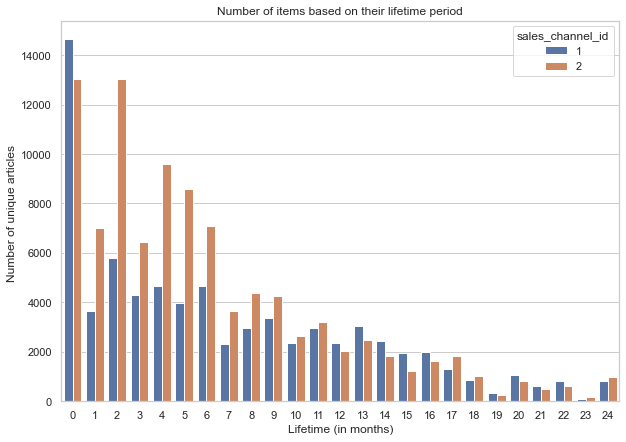

In [77]:
dates_min_max = dates_min_max.sort_values('diff_month')
# 2 - online, 1- store

plt.figure(figsize=(10, 7))
sns.countplot(x='diff_month', data=dates_min_max.sort_values('diff_month'), hue='sales_channel_id') 

plt.xlabel("Lifetime (in months)")
plt.ylabel("Number of unique articles ")
plt.title("Number of items based on their lifetime period") 
plt.show(fig)

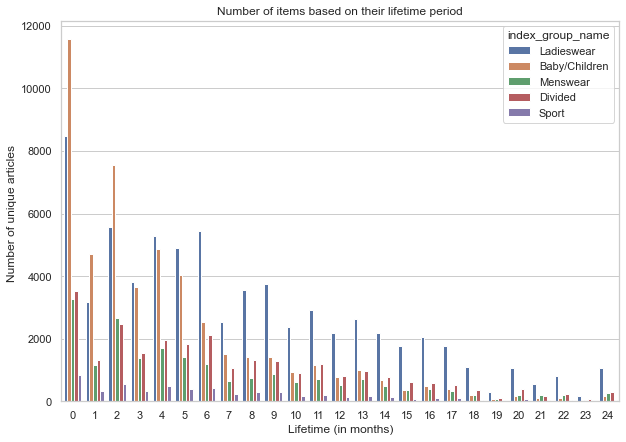

In [78]:
dates_min_max = dates_min_max.sort_values('diff_month')
# 2 - online, 1- store

plt.figure(figsize=(10, 7))
sns.countplot(x='diff_month', data=dates_min_max.sort_values('diff_month'), hue='index_group_name') 

plt.xlabel("Lifetime (in months)")
plt.ylabel("Number of unique articles ")
plt.title("Number of items based on their lifetime period") 
plt.show(fig)

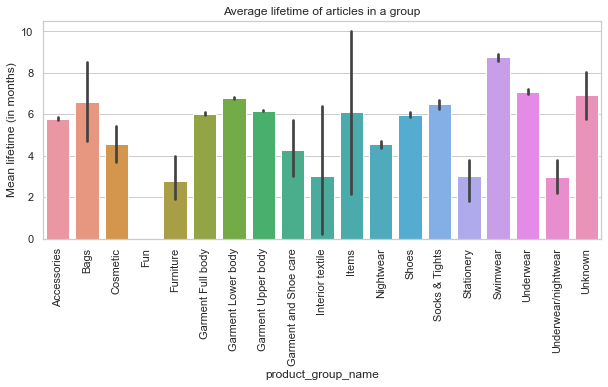

In [79]:
plt.figure(figsize=(10, 4))

sns.barplot(
    x="product_group_name", 
    y='diff_month',
    data=dates_min_max.sort_values('product_group_name')
)

plt.xticks(rotation=90)


plt.xlabel("product_group_name")
plt.ylabel("Mean lifetime (in months)")
plt.title("Average lifetime of articles in a group") 
plt.show(fig)

In [35]:
dates_min_max[dates_min_max['product_group_name']=='Fun'] ## only 3 records with diff_month = 0

,article_id,sales_channel_id,min,max,count,month_year_max,month_year_min,diff_month,product_code,prod_name,product_type_name,product_group_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name
168771,924851002,1,2020-09-09,2020-09-09,1,2020-09-01,2020-09-01,0,924851,HLW Bucket,Toy,Fun,4216,Dress-up Boys,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D"
168777,924851002,2,2020-09-19,2020-09-21,3,2020-09-01,2020-09-01,0,924851,HLW Bucket,Toy,Fun,4216,Dress-up Boys,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D"
170022,867904001,2,2020-09-06,2020-09-06,1,2020-09-01,2020-09-01,0,867904,HLW MASK OWN,Toy,Fun,4216,Dress-up Boys,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D"


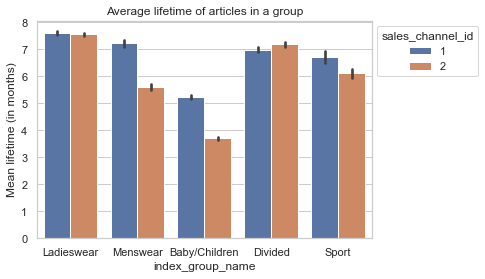

In [80]:
# Set the figure size
plt.figure(figsize=(6, 4))

# plot a bar chart
fig = sns.barplot(
    x="index_group_name", 
    y='diff_month',
    data=dates_min_max,
    hue='sales_channel_id'
)

sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("index_group_name")
plt.ylabel("Mean lifetime (in months)")
plt.title("Average lifetime of articles in a group") 
plt.show(fig)

## Cold start exploration 

Inspired by https://www.kaggle.com/code/wti200/cold-start/notebook?scriptVersionId=88655405&cellId=10 

#### Channel 1

In [90]:
transactions['min_date'] = transactions.groupby(['sales_channel_id', 'customer_id'])['t_dat'].transform('min')

new_transactions = transactions[transactions['sales_channel_id'] == 1]
new_transactions['is_first'] = np.where((new_transactions['min_date'] == new_transactions['t_dat']), 1, 0)
new_transactions = new_transactions.merge(articles[articles_columns], on='article_id')

C:\Users\ekima\AppData\Local\Temp/ipykernel_22788/167271232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_transactions['is_first'] = np.where((new_transactions['min_date'] == new_transactions['t_dat']), 1, 0)


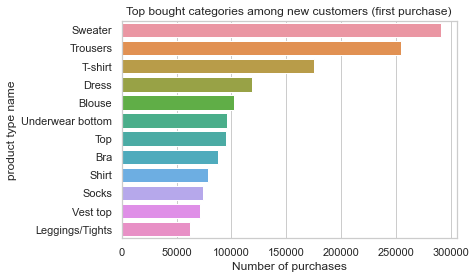

In [91]:
fig = sns.barplot(x='product_type_name', y='index', 
            data=new_transactions[new_transactions['is_first'] == 1]['product_type_name'].value_counts()[:12].reset_index(), 
            ci=None)  ## mean lifetime of an article number 

plt.xlabel("Number of purchases")
plt.ylabel("product type name")
plt.title("Top bought categories among new customers (first purchase)") 
plt.show(fig)

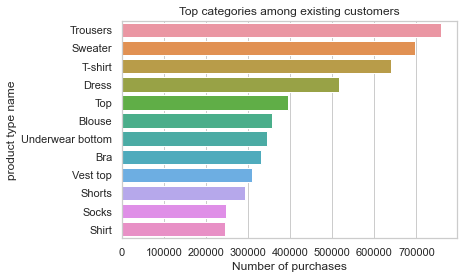

In [92]:
fig = sns.barplot(x='product_type_name', y='index', 
            data=new_transactions[new_transactions['is_first'] == 0]['product_type_name'].value_counts()[:12].reset_index(), 
            ci=None)  ## mean lifetime of an article number 

plt.xlabel("Number of purchases")
plt.ylabel("product type name")
plt.title("Top categories among existing customers") 
plt.show(fig)

#### Channel 2

In [93]:
transactions['min_date'] = transactions.groupby(['sales_channel_id', 'customer_id'])['t_dat'].transform('min')

new_transactions = transactions[transactions['sales_channel_id'] == 2]
new_transactions['is_first'] = np.where((new_transactions['min_date'] == new_transactions['t_dat']), 1, 0)
new_transactions = new_transactions.merge(articles[articles_columns], on='article_id')

C:\Users\ekima\AppData\Local\Temp/ipykernel_22788/676433767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_transactions['is_first'] = np.where((new_transactions['min_date'] == new_transactions['t_dat']), 1, 0)


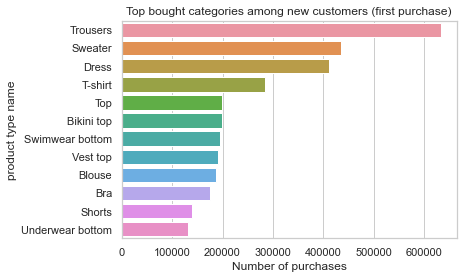

In [94]:
fig = sns.barplot(x='product_type_name', y='index', 
            data=new_transactions[new_transactions['is_first'] == 1]['product_type_name'].value_counts()[:12].reset_index(), 
            ci=None)  ## mean lifetime of an article number 

plt.xlabel("Number of purchases")
plt.ylabel("product type name")
plt.title("Top bought categories among new customers (first purchase)") 
plt.show(fig)

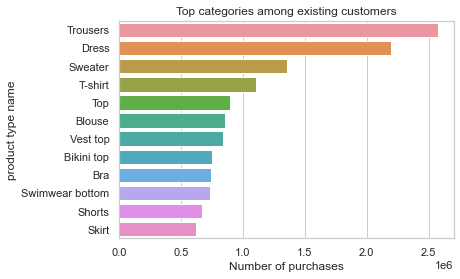

In [95]:
fig = sns.barplot(x='product_type_name', y='index', 
            data=new_transactions[new_transactions['is_first'] == 0]['product_type_name'].value_counts()[:12].reset_index(), 
            ci=None)  ## mean lifetime of an article number 

plt.xlabel("Number of purchases")
plt.ylabel("product type name")
plt.title("Top categories among existing customers") 
plt.show(fig)

## Prices

In [45]:
transactions['mean_price'] = transactions.groupby(['t_month', 'article_id', 'sales_channel_id'])['price'].transform('mean')
transactions['std_price'] = transactions.groupby(['t_month', 'article_id', 'sales_channel_id'])['price'].transform('std')

In [51]:
article_list = transactions['article_id'].value_counts()[:3].index
print(article_list)

Int64Index([706016001, 706016002, 372860001], dtype='int64')


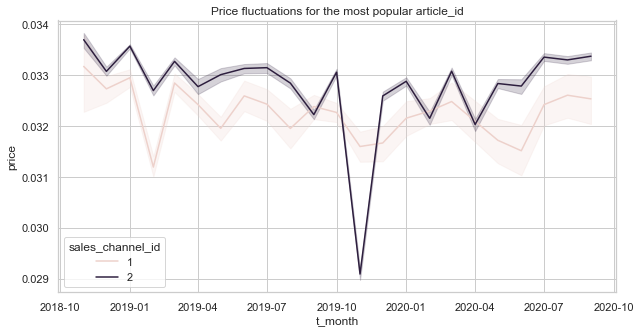

In [85]:
plt.figure(figsize=(10, 5))
fig=sns.lineplot(x="t_month", y="price",
             hue="sales_channel_id", 
             data=transactions[transactions['article_id']==article_list[0]])
plt.title("Price fluctuations for the most popular article_id") 
plt.show(fig)

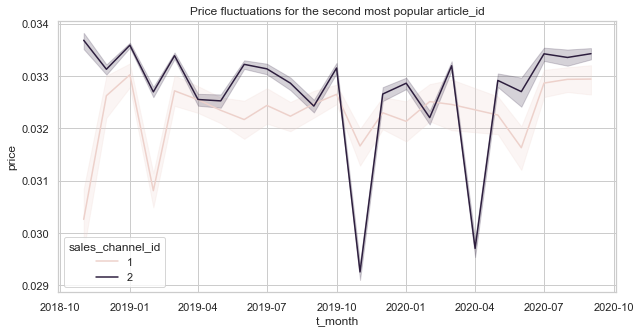

In [86]:

plt.figure(figsize=(10, 5))
fig=sns.lineplot(x="t_month", y="price",
             hue="sales_channel_id", 
             data=transactions[transactions['article_id']==article_list[1]])
plt.title("Price fluctuations for the second most popular article_id")
plt.show(fig)

<AxesSubplot:xlabel='t_month', ylabel='price'>

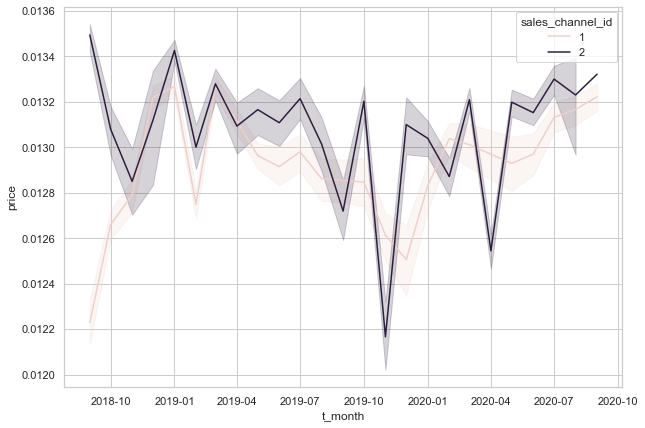

In [87]:

plt.figure(figsize=(10, 7))
sns.lineplot(x="t_month", y="price",
             hue="sales_channel_id", 
             data=transactions[transactions['article_id']==article_list[2]])

In [56]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,min_date,t_month,mean_price,std_price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20,2018-09-01,0.050766,0.000369
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20,2018-09-01,0.030404,0.000455
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20,2018-09-01,0.015148,0.000398
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20,2018-09-01,0.016905,0.000262
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20,2018-09-01,0.016861,0.000477


In [58]:
transactions['t_month_'] = transactions['t_month'].astype(str)
transactions_enriched = transactions[['t_month_', 'article_id', 'sales_channel_id']].merge(articles[articles_columns])

<Figure size 720x504 with 0 Axes>

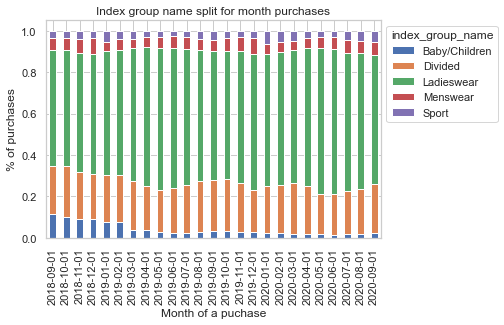

In [88]:
plt.figure(figsize=(10, 7))
fig = transactions_enriched.groupby('t_month_')['index_group_name'].value_counts(normalize=True).unstack('index_group_name').plot.bar(stacked=True)

sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Month of a puchase")
plt.ylabel("% of purchases")
plt.title("Index group name split for month purchases") 

plt.show()

<Figure size 720x504 with 0 Axes>

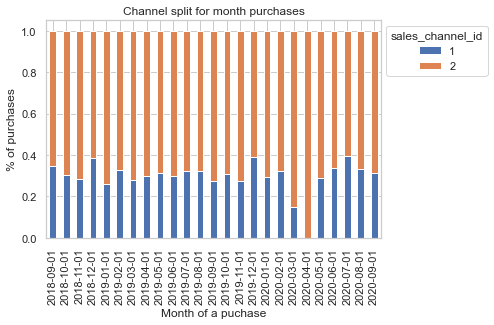

In [89]:
plt.figure(figsize=(10, 7))
fig = transactions_enriched.groupby('t_month_')['sales_channel_id'].value_counts(normalize=True).unstack('sales_channel_id').plot.bar(stacked=True)

sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Month of a puchase")
plt.ylabel("% of purchases")
plt.title("Channel split for month purchases") 

plt.show()